In [79]:
# imports a library 'pandas', names it as 'pd'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image

# enables inline plots, without it plots don't show up in the notebook
%matplotlib inline
from matplotlib import interactive
interactive(True)

In [80]:
import seaborn as sns

### load Jin * Hamish's pre-cleaned data

In [2]:

#df = pd.read_csv("/Users/dlicht/ds/metis/metisgh/DataSets/MTA/month_data_updated.csv")
df = pd.read_csv("/Users/dlicht/ds/metis/metisgh/DataSets/MTA/clean_data.csv")



/Users/dlicht/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.columns

Index(['Unnamed: 0', 'control_area', 'unit', 'scp', 'station', 'linename',
       'division', 'date', 'time', 'desc', 'cum_entries', 'cum_exits',
       'parsed_datetime', 'shift_cum_entries', 'shift_cum_exits',
       'shift_datetime', 'entries', 'exits', 'parsed_date'],
      dtype='object')

In [4]:
df.head()

,Unnamed: 0,control_area,unit,scp,station,linename,division,date,time,desc,cum_entries,cum_exits,parsed_datetime,shift_cum_entries,shift_cum_exits,shift_datetime,entries,exits,parsed_date
0,0,A002,R051,02-00-00,59 ST,NQR456,BMT,06/18/2016,00:00:00,REGULAR,5704958,1934814,2016-06-18 00:00:00,NaN,NaN,NaN,NaN,NaN,2016-06-18
1,1,A002,R051,02-00-00,59 ST,NQR456,BMT,06/18/2016,04:00:00,REGULAR,5704958,1934829,2016-06-18 04:00:00,5704958.0,1934814.0,2016-06-18 00:00:00,0.0,15.0,2016-06-18
2,2,A002,R051,02-00-00,59 ST,NQR456,BMT,06/18/2016,08:00:00,REGULAR,5704958,1934886,2016-06-18 08:00:00,5704958.0,1934829.0,2016-06-18 04:00:00,0.0,57.0,2016-06-18
3,3,A002,R051,02-00-00,59 ST,NQR456,BMT,06/18/2016,12:00:00,REGULAR,5704958,1934993,2016-06-18 12:00:00,5704958.0,1934886.0,2016-06-18 08:00:00,0.0,107.0,2016-06-18
4,4,A002,R051,02-00-00,59 ST,NQR456,BMT,06/18/2016,16:00:00,REGULAR,5704958,1935069,2016-06-18 16:00:00,5704958.0,1934993.0,2016-06-18 12:00:00,0.0,76.0,2016-06-18


In [5]:
df[['entries','exits']].describe()

,entries,exits
count,1.018832e+07,1.020288e+07
mean,1.807326e+02,1.376159e+02
std,2.626306e+02,2.329257e+02
min,0.000000e+00,0.000000e+00
25%,1.100000e+01,9.000000e+00
50%,7.800000e+01,5.300000e+01
75%,2.470000e+02,1.660000e+02
max,7.975000e+03,7.972000e+03


In [6]:
df.dtypes

Unnamed: 0             int64
control_area          object
unit                  object
scp                   object
station               object
linename              object
division              object
date                  object
time                  object
desc                  object
cum_entries            int64
cum_exits              int64
parsed_datetime       object
shift_cum_entries    float64
shift_cum_exits      float64
shift_datetime        object
entries              float64
exits                float64
parsed_date           object
dtype: object

In [7]:
#convert datetime column to datetime object
#from dateutil.parser import *
from datetime import datetime

#df['datetime_ob'] = df["parsed_datetime"].map(lambda t: parse(t))
df['datetime_ob'] = df["parsed_datetime"].map(lambda t: datetime.strptime(t,'%Y-%m-%d %X'))


In [8]:
df.head(400)

,Unnamed: 0,control_area,unit,scp,station,linename,division,date,time,desc,cum_entries,cum_exits,parsed_datetime,shift_cum_entries,shift_cum_exits,shift_datetime,entries,exits,parsed_date,datetime_ob
0,0,A002,R051,02-00-00,59 ST,NQR456,BMT,06/18/2016,00:00:00,REGULAR,5704958,1934814,2016-06-18 00:00:00,NaN,NaN,NaN,NaN,NaN,2016-06-18,2016-06-18 00:00:00
1,1,A002,R051,02-00-00,59 ST,NQR456,BMT,06/18/2016,04:00:00,REGULAR,5704958,1934829,2016-06-18 04:00:00,5704958.0,1934814.0,2016-06-18 00:00:00,0.0,15.0,2016-06-18,2016-06-18 04:00:00
2,2,A002,R051,02-00-00,59 ST,NQR456,BMT,06/18/2016,08:00:00,REGULAR,5704958,1934886,2016-06-18 08:00:00,5704958.0,1934829.0,2016-06-18 04:00:00,0.0,57.0,2016-06-18,2016-06-18 08:00:00
3,3,A002,R051,02-00-00,59 ST,NQR456,BMT,06/18/2016,12:00:00,REGULAR,5704958,1934993,2016-06-18 12:00:00,5704958.0,1934886.0,2016-06-18 08:00:00,0.0,107.0,2016-06-18,2016-06-18 12:00:00
4,4,A002,R051,02-00-00,59 ST,NQR456,BMT,06/18/2016,16:00:00,REGULAR,5704958,1935069,2016-06-18 16:00:00,5704958.0,1934993.0,2016-06-18 12:00:00,0.0,76.0,2016-06-18,2016-06-18 16:00:00
5,5,A002,R051,02-00-00,59 ST,NQR456,BMT,06/18/2016,20:00:00,REGULAR,5704958,1935132,2016-06-18 20:00:00,5704958.0,1935069.0,2016-06-18 16:00:00,0.0,63.0,2016-06-18,2016-06-18 20:00:00
6,6,A002,R051,02-00-00,59 ST,NQR456,BMT,06/19/2016,00:00:00,REGULAR,5704958,1935168,2016-06-19 00:00:00,5704958.0,1935132.0,2016-06-18 20:00:00,0.0,36.0,2016-06-19,2016-06-19 00:00:00
7,7,A002,R051,02-00-00,59 ST,NQR456,BMT,06/19/2016,04:00:00,REGULAR,5704958,1935172,2016-06-19 04:00:00,5704958.0,1935168.0,2016-06-19 00:00:00,0.0,4.0,2016-06-19,2016-06-19 04:00:00
8,8,A002,R051,02-00-00,59 ST,NQR456,BMT,06/19/2016,08:00:00,REGULAR,5704958,1935207,2016-06-19 08:00:00,5704958.0,1935172.0,2016-06-19 04:00:00,0.0,35.0,2016-06-19,2016-06-19 08:00:00
9,9,A002,R051,02-00-00,59 ST,NQR456,BMT,06/19/2016,12:00:00,REGULAR,5704958,1935302,2016-06-19 12:00:00,5704958.0,1935207.0,2016-06-19 08:00:00,0.0,95.0,2016-06-19,2016-06-19 12:00:00


In [9]:
# confirm negative/zero values removed (this is Jin's code)
print('percentage of negative entries', "{0:.3f}%".format(df[df.entries < 0].shape[0]/df.shape[0]))
print('percentage of zero entries', "{0:.3f}%".format(df[df.entries == 0].shape[0]/df.shape[0]))
print('percentage of negative exits', "{0:.3f}%".format(df[df.exits < 0].shape[0]/df.shape[0]))
print('percentage of zero entries', "{0:.3f}%".format(df[df.exits == 0].shape[0]/df.shape[0]))

# - since negative percentage is small, we can take a look at the negative numbers to tell how the numbers are wrong
# - the zero recordings are likely to be from the station closing
# - we can manually get a sense the outlieres of positive numbers by eyeballing the numbers


percentage of negative entries 0.000%
percentage of zero entries 0.146%
percentage of negative exits 0.000%
percentage of zero entries 0.143%


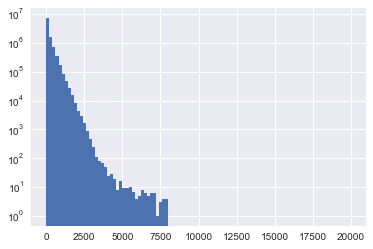

In [81]:
plt.hist(df.entries,bins = 100, range=(0,20000),log=True);

## reject outliers greater than 15000 (if any left)

In [11]:
df_15K_reject = df[df.entries<15000]
df_15K_reject = df_15K_reject[df_15K_reject.exits<15000]

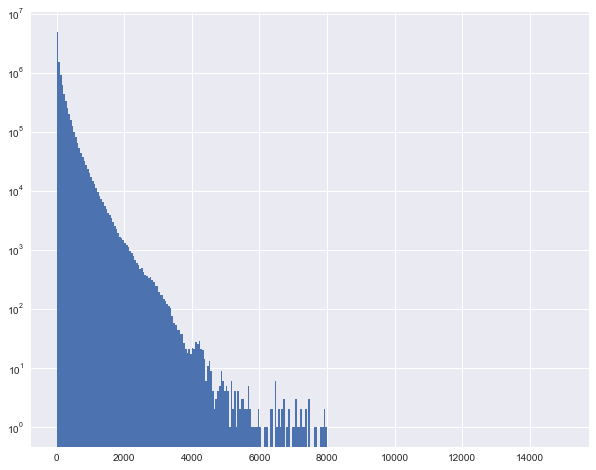

In [84]:
plt.figure(figsize=(10, 8))
plt.hist(df_15K_reject.exits,bins = 300, range=(0,15000),log=True);

In [13]:
#total up per station
sdf = df_15K_reject.groupby('station').sum()
sdf.head()

,Unnamed: 0,cum_entries,cum_exits,shift_cum_entries,shift_cum_exits,entries,exits
station,,,,,,,
1 AV,35095593390,3205784448550,3278961163313,3.205777e+12,3.278953e+12,7356208.0,7683462.0
103 ST,219554931449,341242500179,1302072910646,3.412320e+11,1.302066e+12,10501693.0,7069818.0
103 ST-CORONA,190412563452,150805305037,141972204506,1.507986e+11,1.419673e+11,6731482.0,4917100.0
104 ST,36957393956,948504182800,826813801092,9.485032e+11,8.268134e+11,1012987.0,436108.0
110 ST,110471952457,65358814917,65401085624,6.535482e+10,6.539802e+10,3997985.0,3065318.0


In [14]:
#total station activity
sEE = sdf[['entries','exits']]
sEE

,entries,exits
station,,
1 AV,7356208.0,7683462.0
103 ST,10501693.0,7069818.0
103 ST-CORONA,6731482.0,4917100.0
104 ST,1012987.0,436108.0
110 ST,3997985.0,3065318.0
111 ST,5458050.0,3357172.0
116 ST,11190912.0,5710506.0
116 ST-COLUMBIA,4741974.0,2398790.0
121 ST,623918.0,414586.0


(array([ 286.,   58.,   16.,    6.,    5.,    4.,    2.,    1.,    1.,    1.]),
 array([  1.82350000e+04,   5.38243990e+06,   1.07466448e+07,
          1.61108497e+07,   2.14750546e+07,   2.68392595e+07,
          3.22034644e+07,   3.75676693e+07,   4.29318742e+07,
          4.82960791e+07,   5.36602840e+07]),
 <a list of 10 Patch objects>)

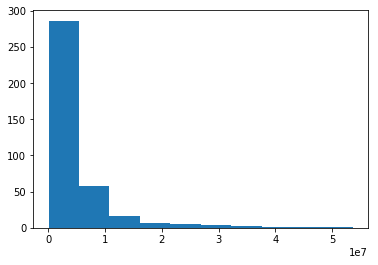

In [15]:
plt.hist(sEE.entries)

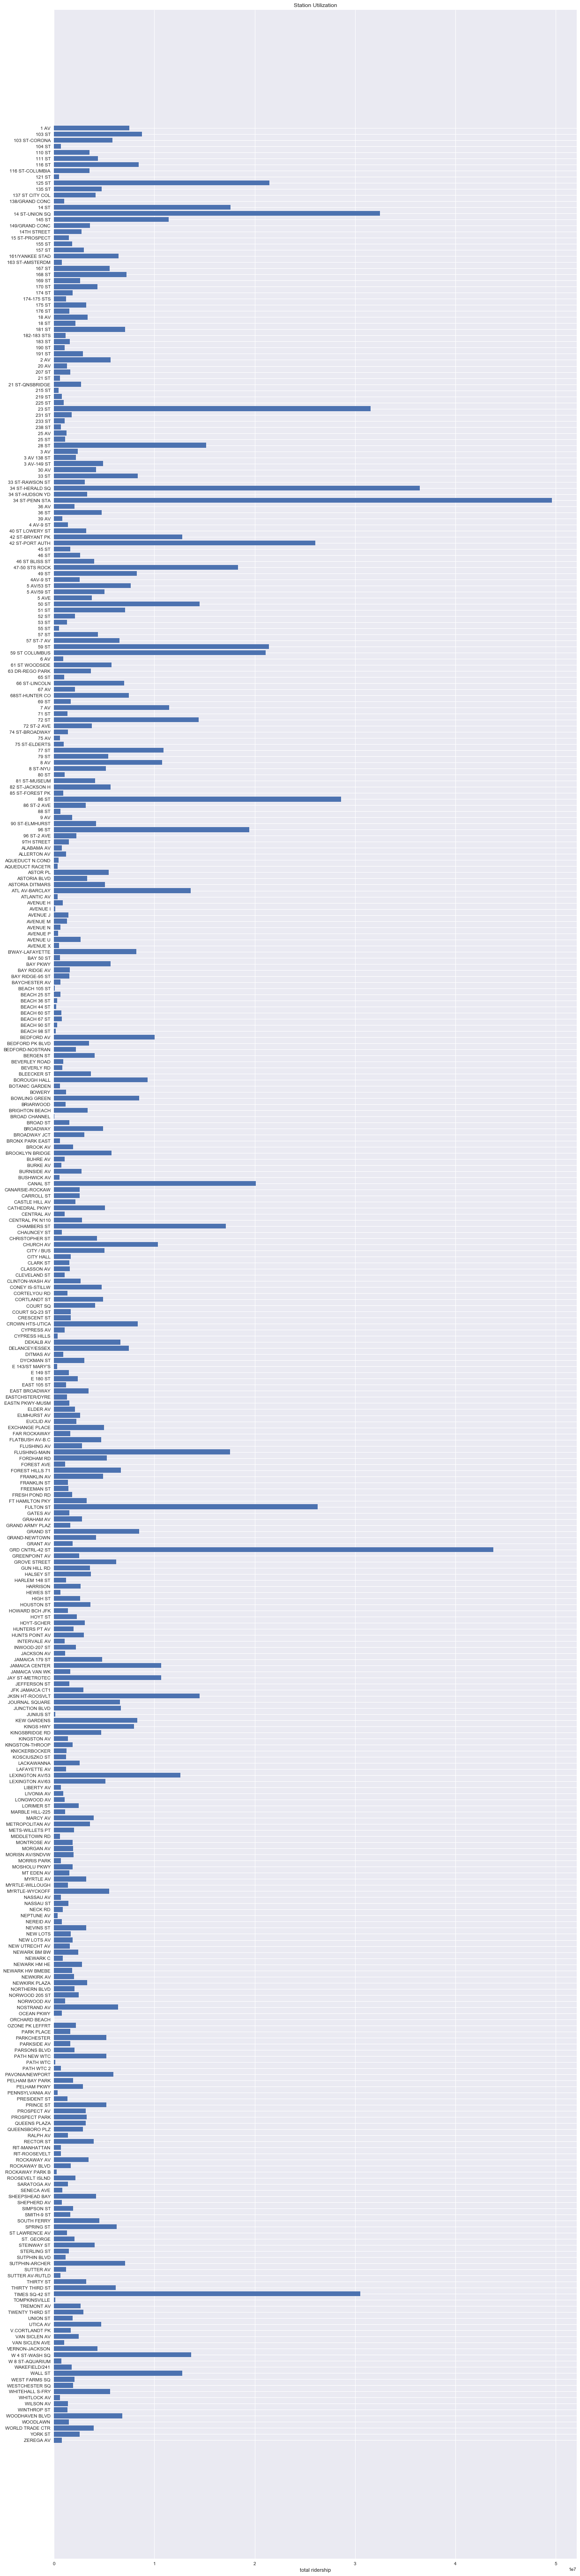

In [87]:

fig, ax = plt.subplots(figsize=(20, 100))
y_pos = np.arange(len(sEE.index))
ax.set_yticks(y_pos)
ax.set_yticklabels(sEE.index,fontsize=10)
ax.invert_yaxis()
ax.set_xlabel('total ridership')
ax.set_title('Station Utilization')
plt.barh(y_pos,(sEE.entries+sEE.exits)/2,log=False);
#plt.barh(sEE.index,sEE.entries,log=False)

In [195]:
sEE.index

Index(['1 AV', '103 ST', '103 ST-CORONA', '104 ST', '110 ST', '111 ST',
       '116 ST', '116 ST-COLUMBIA', '121 ST', '125 ST',
       ...
       'WESTCHESTER SQ', 'WHITEHALL S-FRY', 'WHITLOCK AV', 'WILSON AV',
       'WINTHROP ST', 'WOODHAVEN BLVD', 'WOODLAWN', 'WORLD TRADE CTR',
       'YORK ST', 'ZEREGA AV'],
      dtype='object', name='station', length=380)

## find the 20 busiest stations

In [18]:
sEE['activity'] = sEE.apply(lambda x: (x['entries']+x['exits']),axis=1)

#weather_temps.apply(lambda x: x['Temp (C)'] - 2*x['Temp (F)'],axis=1)
sEE

/Users/dlicht/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,entries,exits,activity
station,,,
1 AV,7356208.0,7683462.0,15039670.0
103 ST,10501693.0,7069818.0,17571511.0
103 ST-CORONA,6731482.0,4917100.0,11648582.0
104 ST,1012987.0,436108.0,1449095.0
110 ST,3997985.0,3065318.0,7063303.0
111 ST,5458050.0,3357172.0,8815222.0
116 ST,11190912.0,5710506.0,16901418.0
116 ST-COLUMBIA,4741974.0,2398790.0,7140764.0
121 ST,623918.0,414586.0,1038504.0


In [155]:
sorted_sEE = sEE.sort_values('exits',ascending=False)
#sorted_sEE = sEE.sort_values('activity',ascending=False)
sorted_sEE.head()

,entries,exits,activity
station,,,
34 ST-PENN STA,53660284.0,45541257.0,99201541.0
GRD CNTRL-42 ST,46199400.0,41389109.0,87588509.0
34 ST-HERALD SQ,38251031.0,34602532.0,72853563.0
14 ST-UNION SQ,34969403.0,29989664.0,64959067.0
TIMES SQ-42 ST,31826036.0,29176126.0,61002162.0


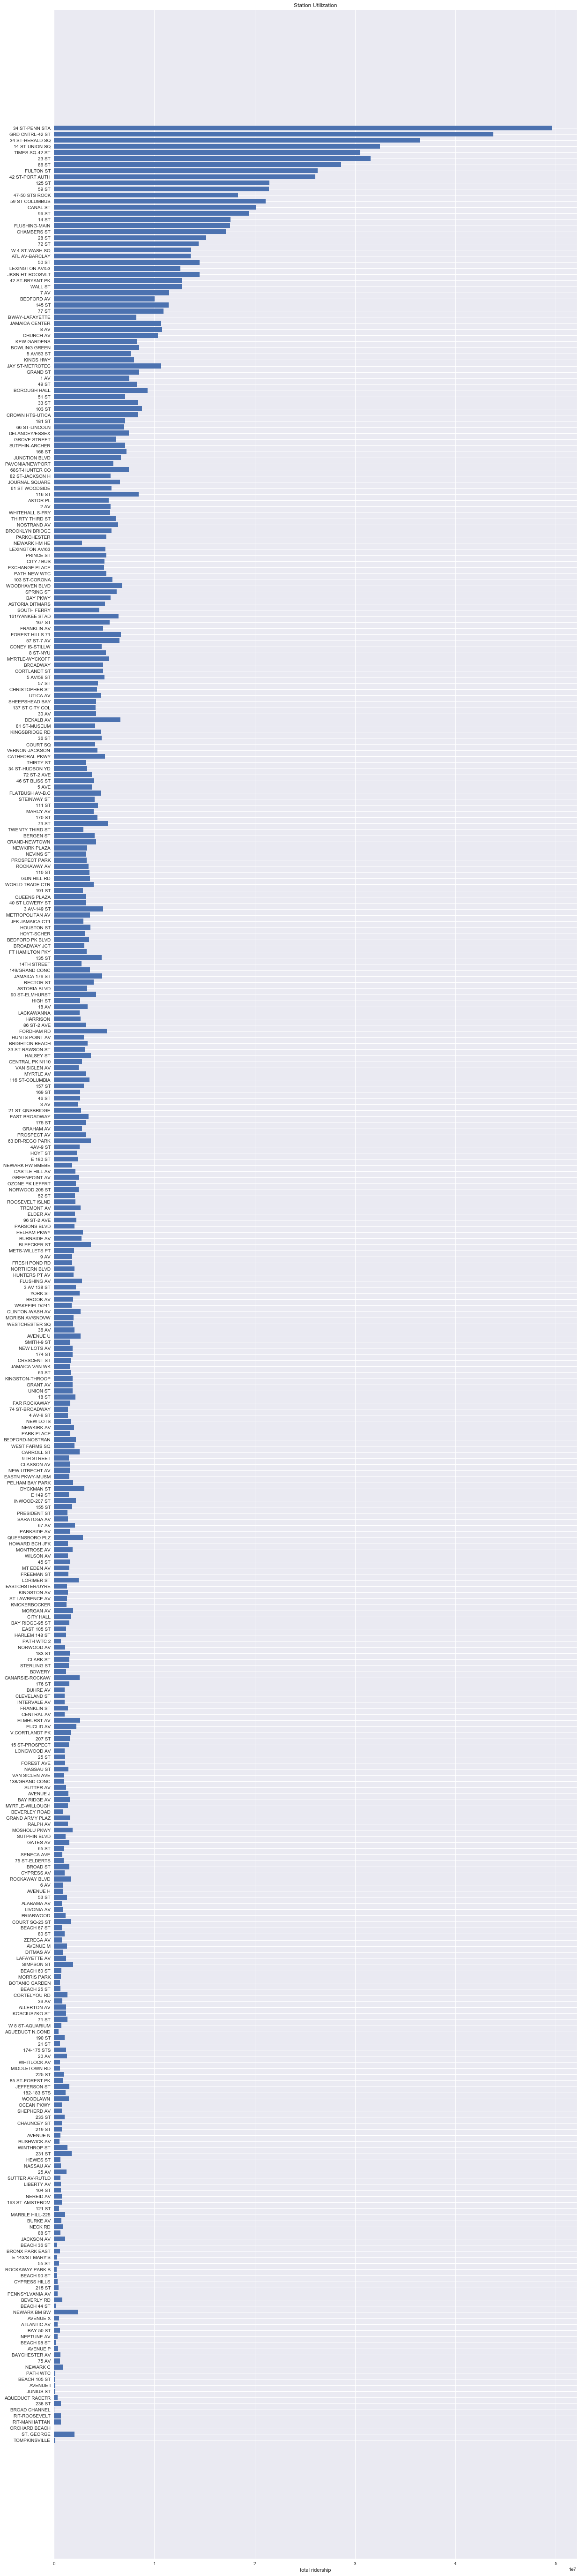

In [156]:
fig, ax = plt.subplots(figsize=(20, 100))
y_pos = np.arange(len(sorted_sEE.index))
ax.set_yticks(y_pos)
ax.set_yticklabels(sorted_sEE.index,fontsize=10)
ax.invert_yaxis()
ax.set_xlabel('Total Exits')
ax.set_title('Station Utilization - Exits Only')
plt.barh(y_pos,(sorted_sEE.entries+sorted_sEE.exits)/2,log=False);


In [157]:
sorted_sEE.iloc[0:20]

,entries,exits,activity
station,,,
34 ST-PENN STA,53660284.0,45541257.0,99201541.0
GRD CNTRL-42 ST,46199400.0,41389109.0,87588509.0
34 ST-HERALD SQ,38251031.0,34602532.0,72853563.0
14 ST-UNION SQ,34969403.0,29989664.0,64959067.0
TIMES SQ-42 ST,31826036.0,29176126.0,61002162.0
23 ST,36595924.0,26546415.0,63142339.0
86 ST,31242984.0,26022207.0,57265191.0
FULTON ST,29088820.0,23442191.0,52531011.0
42 ST-PORT AUTH,29344202.0,22711643.0,52055845.0


In [162]:
TopStations=sorted_sEE.iloc[0:20]
TopStations.index

Index(['34 ST-PENN STA', 'GRD CNTRL-42 ST', '34 ST-HERALD SQ',
       '14 ST-UNION SQ', 'TIMES SQ-42 ST', '23 ST', '86 ST', 'FULTON ST',
       '42 ST-PORT AUTH', '125 ST', '59 ST', '47-50 STS ROCK',
       '59 ST COLUMBUS', 'CANAL ST', '96 ST', '14 ST', 'FLUSHING-MAIN',
       'CHAMBERS ST', '28 ST', '72 ST'],
      dtype='object', name='station')

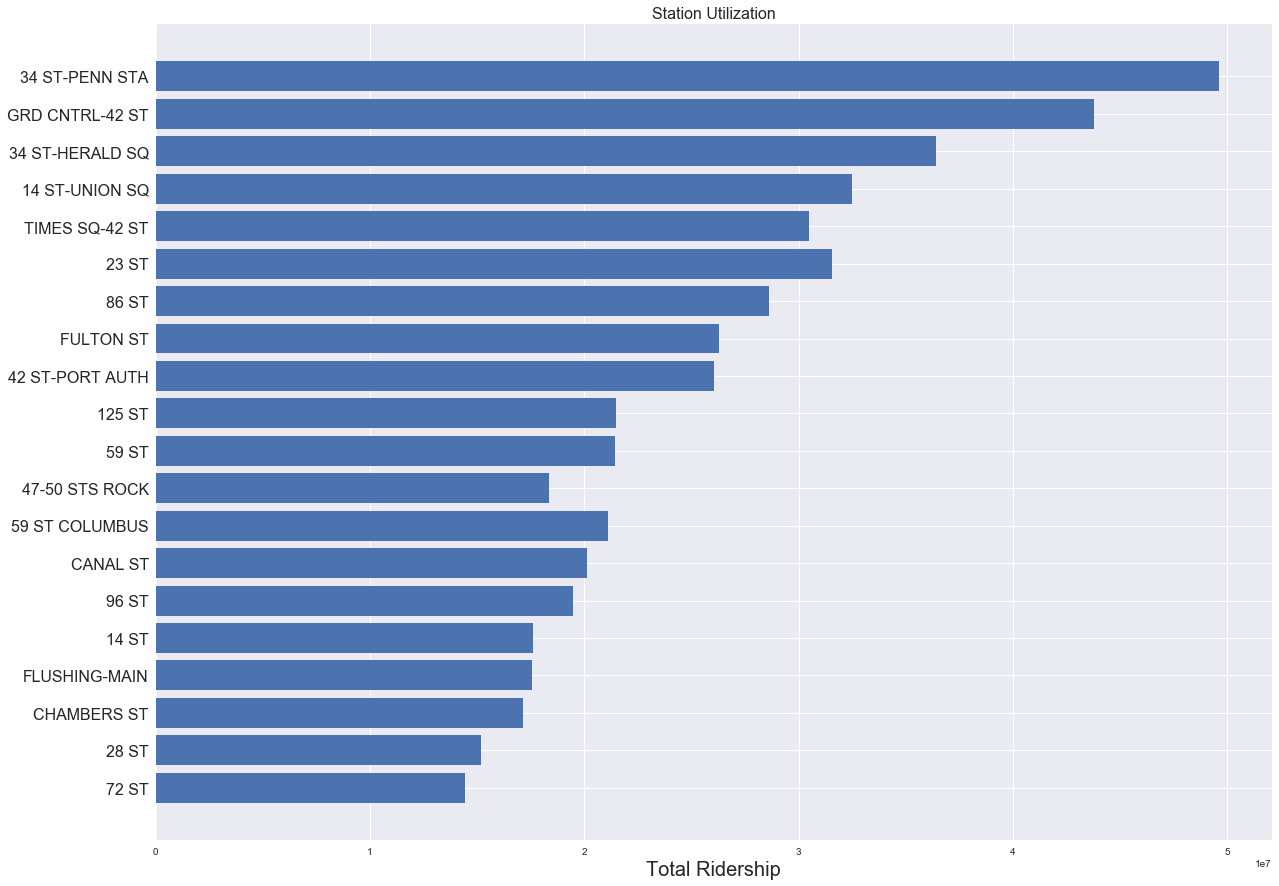

In [163]:
fig, ax = plt.subplots(figsize=(20, 15))
y_pos = np.arange(len(TopStations.index))
ax.set_yticks(y_pos)
ax.set_yticklabels(TopStations.index,fontsize=16)
ax.invert_yaxis()
ax.set_xlabel('Total Ridership (in Tens of Millions)',fontsize=20)
ax.set_title('Station Utilization',fontsize=16)
plt.barh(y_pos,(TopStations.entries+TopStations.exits)/2,log=False);



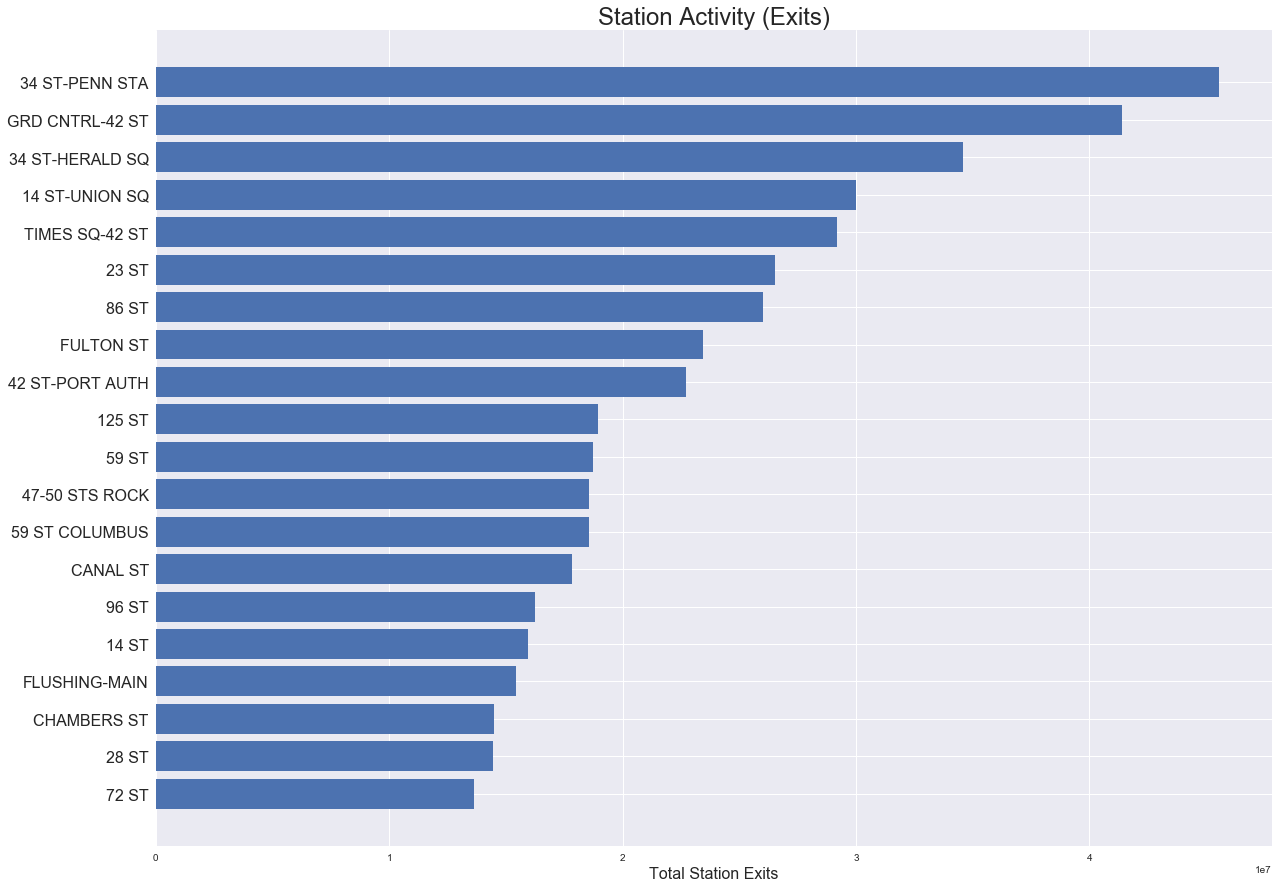

In [197]:
fig, ax = plt.subplots(figsize=(20, 15))
y_pos = np.arange(len(TopStations.index))
ax.set_yticks(y_pos)
ax.set_yticklabels(TopStations.index,fontsize=16)
ax.invert_yaxis()
ax.set_xlabel('Total Station Exits',fontsize=16)
ax.set_title('Station Activity (Exits)',fontsize=24)
plt.barh(y_pos,(TopStations.exits),log=False);



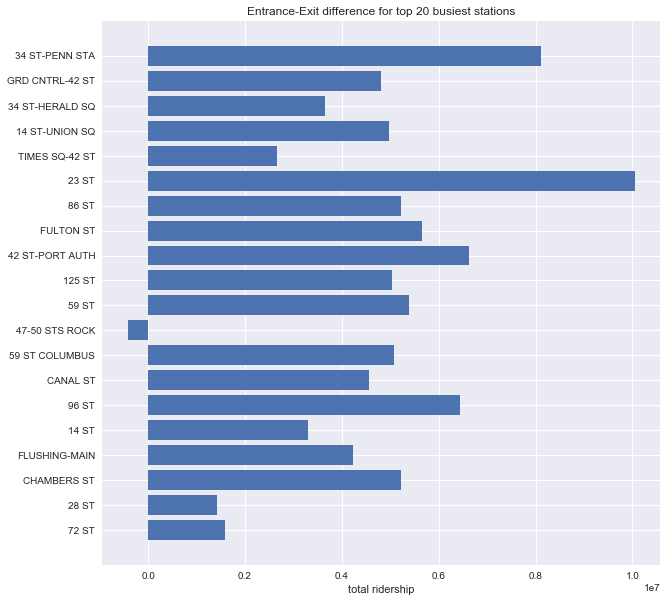

In [165]:

fig, ax = plt.subplots(figsize=(10, 10))
y_pos = np.arange(len(TopStations.index))
ax.set_yticks(y_pos)
ax.set_yticklabels(TopStations.index)
ax.invert_yaxis()
ax.set_xlabel('total ridership')
ax.set_title('Entrance-Exit difference for top 20 busiest stations')
plt.barh(y_pos,(TopStations.entries-TopStations.exits),log=False);



In [25]:
df_15K_reject.columns

Index(['Unnamed: 0', 'control_area', 'unit', 'scp', 'station', 'linename',
       'division', 'date', 'time', 'desc', 'cum_entries', 'cum_exits',
       'parsed_datetime', 'shift_cum_entries', 'shift_cum_exits',
       'shift_datetime', 'entries', 'exits', 'parsed_date', 'datetime_ob'],
      dtype='object')

In [26]:
df_station_hourly = df_15K_reject.groupby(['station','datetime_ob']).sum()

df_station_hourly.head()

Unnamed: 0  cum_entries   cum_exits  \
station datetime_ob                                                
1 AV    2016-06-18 08:00:00    15718424   1410889373  1463845474   
        2016-06-18 12:00:00    15718434   1410892350  1463848369   
        2016-06-18 16:00:00     7887138    967453512  1028122253   
        2016-06-18 20:00:00    15718449   1410901986  1463858247   
        2016-06-19 00:00:00    15718459   1410905794  1463862473   

                             shift_cum_entries  shift_cum_exits  entries  \
station datetime_ob                                                        
1 AV    2016-06-18 08:00:00       1.410887e+09     1.463843e+09   2596.0   
        2016-06-18 12:00:00       1.410889e+09     1.463845e+09   2977.0   
        2016-06-18 16:00:00       9.674511e+08     1.028120e+09   2366.0   
        2016-06-18 20:00:00       1.410895e+09     1.463851e+09   7270.0   
        2016-06-19 00:00:00       1.410902e+09     1.463858e+09   3808.0   

                              exits  
station datetime_ob                  
1 AV    2016-06-18 08:00:00  2449.0  
        2016-06-18 12:00:00  2895.0  
        2016-06-18 16:00:00  2279.0  
        2016-06-18 20:00:00  7599.0  
        2016-06-19 00:00:00  4226.0

In [27]:
df_station_hourly.sample(20)

,,Unnamed: 0,cum_entries,cum_exits,shift_cum_entries,shift_cum_exits,entries,exits
station,datetime_ob,,,,,,,
BAY 50 ST,2017-05-19 17:00:00,4336878,10840063,8534425,1.083940e+07,8.534300e+06,665.0,125.0
GROVE STREET,2017-04-14 11:32:34,5876818,617597,530880,6.167570e+05,5.307020e+05,840.0,178.0
5 AVE,2016-09-05 08:00:00,90767691,484162254,297506899,4.841622e+08,2.975067e+08,75.0,191.0
135 ST,2017-02-25 08:00:00,25326358,204830816,31812543,2.048307e+08,3.181242e+07,150.0,118.0
AQUEDUCT N.COND,2016-11-23 08:00:00,17461014,4881792,5984904,4.881357e+06,5.984846e+06,435.0,58.0
LIBERTY AV,2017-04-14 01:00:00,10071328,11727444,6664549,1.172732e+07,6.664387e+06,129.0,162.0
176 ST,2017-03-03 15:00:00,25158850,12408511,8119760,1.240754e+07,8.119306e+06,970.0,454.0
GROVE STREET,2016-09-01 07:38:46,5854459,338682,591326,3.386250e+05,5.912830e+05,57.0,43.0
67 AV,2016-12-03 11:00:00,43430566,41166755,27402864,4.116547e+07,2.740255e+07,1289.0,312.0


In [28]:
df_station_hourly

Unnamed: 0  cum_entries   cum_exits  \
station   datetime_ob                                                
1 AV      2016-06-18 08:00:00    15718424   1410889373  1463845474   
          2016-06-18 12:00:00    15718434   1410892350  1463848369   
          2016-06-18 16:00:00     7887138    967453512  1028122253   
          2016-06-18 20:00:00    15718449   1410901986  1463858247   
          2016-06-19 00:00:00    15718459   1410905794  1463862473   
          2016-06-19 04:00:00    15718469   1410907425  1463863909   
          2016-06-19 08:00:00    15718479   1410907878  1463864642   
          2016-06-19 12:00:00    15718489   1410910027  1463866882   
          2016-06-19 16:00:00    15718499   1410913457  1463870273   
          2016-06-19 20:00:00    15718509   1410917271  1463874858   
          2016-06-20 00:00:00    15718519   1410919961  1463878027   
          2016-06-20 04:00:00    15718529   1410920449  1463878501   
          2016-06-20 07:43:16     7831351    443455433   435742873   
          2016-06-20 08:00:00    15718544   1410922161  1463881833   
          2016-06-20 12:00:00    15718554   1410927456  1463887045   
          2016-06-20 16:00:00    15718564   1410931748  1463891323   
          2016-06-20 20:00:00    15718574   1410938744  1463897919   
          2016-06-21 00:00:00    15718584   1410942555  1463901447   
          2016-06-21 04:00:00    15718594   1410943181  1463901830   
          2016-06-21 08:00:00    15718604   1410944996  1463905191   
          2016-06-21 12:00:00    15718614   1410950711  1463911649   
          2016-06-21 16:00:00    15718624   1410954986  1463916060   
          2016-06-21 20:00:00    15718634   1410962096  1463922875   
          2016-06-22 00:00:00    15718644   1410966424  1463926927   
          2016-06-22 04:00:00    15718654   1410967144  1463927382   
          2016-06-22 08:00:00    15718664   1410968928  1463930677   
          2016-06-22 12:00:00    15718674   1410974728  1463935694   
          2016-06-22 16:00:00    15718684   1410979070  1463940217   
          2016-06-22 20:00:00    15718694   1410986200  1463947141   
          2016-06-23 00:00:00    15718704   1410990687  1463951231   
...                                   ...          ...         ...   
ZEREGA AV 2017-06-19 01:00:00    45040521     53748766     1048225   
          2017-06-19 05:00:00    45040526     53748823     1048298   
          2017-06-19 09:00:00    45040531     53749735     1048660   
          2017-06-19 13:00:00    45040536     53750228     1048927   
          2017-06-19 17:00:00    45040541     53750761     1049332   
          2017-06-19 21:00:00    45040546     53751004     1049952   
          2017-06-20 01:00:00    45040551     53751072     1050137   
          2017-06-20 05:00:00    45040556     53751133     1050188   
          2017-06-20 09:00:00    45040561     53752086     1050563   
          2017-06-20 13:00:00    45040566     53752550     1050787   
          2017-06-20 17:00:00    45040571     53753114     1051247   
          2017-06-20 21:00:00    45040576     53753413     1051835   
          2017-06-21 01:00:00    45040581     53753491     1052063   
          2017-06-21 05:00:00    45040586     53753554     1052132   
          2017-06-21 09:00:00    45040591     53754562     1052480   
          2017-06-21 13:00:00    45040596     53755049     1052647   
          2017-06-21 17:00:00    45040601     53755558     1053085   
          2017-06-21 21:00:00    45040606     53755880     1053687   
          2017-06-22 01:00:00    45040611     53755953     1053916   
          2017-06-22 05:00:00    45040616     53756016     1053977   
          2017-06-22 09:00:00    45040621     53756989     1054350   
          2017-06-22 13:00:00    45040626     53757441     1054604   
          2017-06-22 17:00:00    45040631     53757965     1055012   
          2017-06-22 21:00:00    45040636     53758273     1055637   
          2017-06-23 01:00:00    45040641

In [29]:
#looking at the entry data for one station only
st23 = df_station_hourly.loc['23 ST'].entries
st23.head(10)

datetime_ob
2016-06-18 05:00:00      567.0
2016-06-18 08:00:00     2994.0
2016-06-18 09:00:00      782.0
2016-06-18 12:00:00     4645.0
2016-06-18 13:00:00     3384.0
2016-06-18 16:00:00    10902.0
2016-06-18 17:00:00     5720.0
2016-06-18 20:00:00    12582.0
2016-06-18 21:00:00     4770.0
2016-06-19 00:00:00     7099.0
Name: entries, dtype: float64

In [30]:
st23.index

DatetimeIndex(['2016-06-18 05:00:00', '2016-06-18 08:00:00',
               '2016-06-18 09:00:00', '2016-06-18 12:00:00',
               '2016-06-18 13:00:00', '2016-06-18 16:00:00',
               '2016-06-18 17:00:00', '2016-06-18 20:00:00',
               '2016-06-18 21:00:00', '2016-06-19 00:00:00',
               ...
               '2017-06-23 04:00:00', '2017-06-23 05:00:00',
               '2017-06-23 08:00:00', '2017-06-23 09:00:00',
               '2017-06-23 12:00:00', '2017-06-23 13:00:00',
               '2017-06-23 16:00:00', '2017-06-23 17:00:00',
               '2017-06-23 20:00:00', '2017-06-23 21:00:00'],
              dtype='datetime64[ns]', name='datetime_ob', length=4620, freq=None)

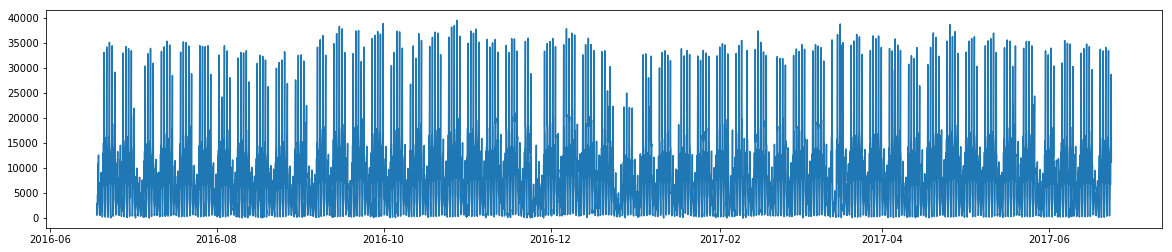

In [31]:
time = st23.index


#from dateutil.parser import *
#time = [parse(t) for t in firstAV.index]
plt.figure(figsize=(20, 4))
plt.plot(time,st23);

#NOTE THE MISSING PEAK ON MAY 29TH, THAT WAS MEMORIAL DAY

In [32]:
time

DatetimeIndex(['2016-06-18 05:00:00', '2016-06-18 08:00:00',
               '2016-06-18 09:00:00', '2016-06-18 12:00:00',
               '2016-06-18 13:00:00', '2016-06-18 16:00:00',
               '2016-06-18 17:00:00', '2016-06-18 20:00:00',
               '2016-06-18 21:00:00', '2016-06-19 00:00:00',
               ...
               '2017-06-23 04:00:00', '2017-06-23 05:00:00',
               '2017-06-23 08:00:00', '2017-06-23 09:00:00',
               '2017-06-23 12:00:00', '2017-06-23 13:00:00',
               '2017-06-23 16:00:00', '2017-06-23 17:00:00',
               '2017-06-23 20:00:00', '2017-06-23 21:00:00'],
              dtype='datetime64[ns]', name='datetime_ob', length=4620, freq=None)

In [33]:
import datetime
st23_hr = st23.index.map(lambda t: t.hour)
st23_hr

Int64Index([ 5,  8,  9, 12, 13, 16, 17, 20, 21,  0,
            ...
             4,  5,  8,  9, 12, 13, 16, 17, 20, 21],
           dtype='int64', name='datetime_ob', length=4620)

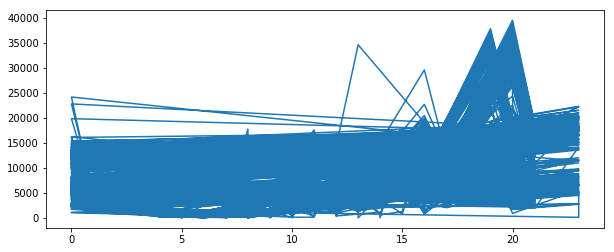

In [34]:
plt.figure(figsize=(10, 4))
plt.plot(st23_hr,st23);

In [35]:
#looking at the entry data for one station only
st23_cum_enter = df_station_hourly.loc['23 ST'].cum_entries
st23_cum_enter.head(10)

datetime_ob
2016-06-18 05:00:00    2194520438
2016-06-18 08:00:00    1568669315
2016-06-18 09:00:00    2194521220
2016-06-18 12:00:00    1568673960
2016-06-18 13:00:00    2194524604
2016-06-18 16:00:00    1568684862
2016-06-18 17:00:00    2194530324
2016-06-18 20:00:00    1568697444
2016-06-18 21:00:00    2194535094
2016-06-19 00:00:00    1568704543
Name: cum_entries, dtype: int64

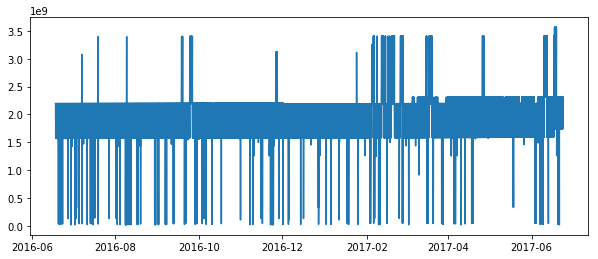

In [36]:
plt.figure(figsize=(10, 4))
plt.plot(time,st23_cum_enter);

In [37]:
df_station_time = df_15K_reject.groupby(['station','time']).sum()

df_station_time.head(10)

Unnamed: 0   cum_entries     cum_exits  shift_cum_entries  \
station time                                                                  
1 AV    00:00:00  3837876687  353212547864  358899928381       3.532117e+11   
        03:00:00  1966335056  176867043799  183507162921       1.768668e+11   
        04:00:00  3830052344  352770747909  358466175571       3.527705e+11   
        06:36:03     7837598     445666765     437345416       4.456666e+08   
        07:00:00  1977368952  177896364862  184576577656       1.778963e+11   
        07:18:31     7894008     969538159    1031053729       9.695381e+08   
        07:21:32     7894371     969646383    1031208295       9.696463e+08   
        07:38:52     7839858     446491619     437929084       4.464908e+08   
        07:41:03     7832727     443943761     436102585       4.439430e+08   
        07:42:14     7836071     445134292     436992785       4.451338e+08   

                  shift_cum_exits   entries     exits  
station time                                           
1 AV    00:00:00     3.588991e+11  872451.0  840843.0  
        03:00:00     1.835070e+11  194241.0  140870.0  
        04:00:00     3.584660e+11  208152.0  151547.0  
        06:36:03     4.373449e+08     183.0     536.0  
        07:00:00     1.845764e+11   69474.0  146924.0  
        07:18:31     1.031053e+09      48.0     272.0  
        07:21:32     1.031208e+09      54.0     271.0  
        07:38:52     4.379278e+08     854.0    1251.0  
        07:41:03     4.361014e+08     804.0    1201.0  
        07:42:14     4.369923e+08     493.0     469.0

In [38]:
#what % of ridership happened during odd time intervals?
#(not multiples of 4hrs)

In [39]:
df = df_15K_reject
df_station_ODDtime = df[(df.time!='00:00:00')&(df.time!='04:00:00')\
                       &(df.time!='08:00:00')&(df.time!='12:00:00')\
                       &(df.time!='16:00:00')&(df.time!='20:00:00')]\
                        .groupby(['station','time']).sum() 
df_station_ODDtime.head(100)

Unnamed: 0   cum_entries     cum_exits  shift_cum_entries  \
station time                                                                  
1 AV    03:00:00  1966335056  176867043799  183507162921       1.768668e+11   
        06:36:03     7837598     445666765     437345416       4.456666e+08   
        07:00:00  1977368952  177896364862  184576577656       1.778963e+11   
        07:18:31     7894008     969538159    1031053729       9.695381e+08   
        07:21:32     7894371     969646383    1031208295       9.696463e+08   
        07:38:52     7839858     446491619     437929084       4.464908e+08   
        07:41:03     7832727     443943761     436102585       4.439430e+08   
        07:42:14     7836071     445134292     436992785       4.451338e+08   
        07:43:16     7831351     443455433     435742873       4.434545e+08   
        07:52:51     7835157     444780229     436744350       4.447791e+08   
        08:01:09     7890523     968484787    1029512934       9.684848e+08   
        08:03:27     7887878     967672913    1028422631       9.676729e+08   
        08:08:20     7837518     445644966     437331023       4.456437e+08   
        08:09:59     7837523     445645012     437331024       4.456450e+08   
        08:11:03     7837528     445645047     437331024       4.456450e+08   
        08:11:10     7887473     967557959    1028268671       9.675579e+08   
        08:12:13     7837533     445645075     437331037       4.456450e+08   
        08:14:43     7837538     445645152     437331114       4.456451e+08   
        08:18:22     7832092     443721277     435937549       4.437208e+08   
        08:18:23     7834647     444598194     436603072       4.445978e+08   
        08:31:41     7834317     444477982     436515223       4.444770e+08   
        08:35:55     7836316     445213006     437044929       4.452109e+08   
        08:55:19     7832097     443722635     435938001       4.437213e+08   
        08:56:35     7840321     446665586     438046785       4.466640e+08   
        09:05:28     7835467     444904186     436830765       4.449022e+08   
        09:09:55     7887723     967627452    1028364417       9.676271e+08   
        09:29:10     7838898     446118407     437677425       4.461156e+08   
        09:40:06     6276585     434398599     424557340       4.343970e+08   
        09:43:43     7887403     967539279    1028240422       9.675388e+08   
        09:53:46     7831807     443625324     435866289       4.436227e+08   
...                      ...           ...           ...                ...   
103 ST  07:19:42    49305616      66074439     541385248       6.607335e+07   
        07:19:57    49310227      59340723     537854487       5.933974e+07   
        07:21:19    49310233      59340737     537854504       5.934072e+07   
        07:22:50    49310239      59340760     537854539       5.934074e+07   
        07:24:10    49310245      59340791     537854567       5.934076e+07   
        07:31:32    42881968      67744696      34599123       6.774373e+07   
        07:33:09     7150756      25430564      22681393       2.543012e+07   
        07:35:12    42881230      67498782      34479477       6.749839e+07   
        07:36:40    42881236      67498788      34479481       6.749878e+07   
        07:39:16    49308334      58839396     537449464       5.883870e+07   
        07:39:21    49303555      65319098     540772990       6.531748e+07   
        07:40:20     7156005      26606964      23525217       2.660656e+07   
        07:54:11    49305011      65852650     541205881       6.585084e+07   
        07:58:49    42876958      66178605      33841595       6.617743e+07   
        08:00:01    49298100      63310987     539065484       6.330918e+07   
        08:01:23    42875470      65719748      33629929       6.571831e+07   
        08:02:34    49305023      65852888     541206087       6.585284e+07   
        08:02:41    49298856      63547924     539269964       6.354

In [40]:
df_station_ODDtime.sum()

Unnamed: 0           2.813902e+13
cum_entries          1.271692e+14
cum_exits            9.067771e+13
shift_cum_entries    1.271683e+14
shift_cum_exits      9.067700e+13
entries              9.287966e+08
exits                7.145255e+08
dtype: float64

In [41]:
df_station_time.sum()

Unnamed: 0           5.223615e+13
cum_entries          2.525137e+14
cum_exits            1.833407e+14
shift_cum_entries    2.525119e+14
shift_cum_exits      1.833393e+14
entries              1.835971e+09
exits                1.396636e+09
dtype: float64

In [42]:
PercentIrregular =  (6.227399e+07+4.850229e+07)/(1.396210e+08+1.071474e+08) 
PercentIrregular

0.44890788285696226

If 45% of the data is found in irregular time entries.  Some type of allowance for this will need to be made...

In [43]:
## needs a riders thus far that day column.

In [44]:
df_hourly = df_15K_reject.groupby(['station','time']).sum()
df_hourly.head()

Unnamed: 0   cum_entries     cum_exits  shift_cum_entries  \
station time                                                                  
1 AV    00:00:00  3837876687  353212547864  358899928381       3.532117e+11   
        03:00:00  1966335056  176867043799  183507162921       1.768668e+11   
        04:00:00  3830052344  352770747909  358466175571       3.527705e+11   
        06:36:03     7837598     445666765     437345416       4.456666e+08   
        07:00:00  1977368952  177896364862  184576577656       1.778963e+11   

                  shift_cum_exits   entries     exits  
station time                                           
1 AV    00:00:00     3.588991e+11  872451.0  840843.0  
        03:00:00     1.835070e+11  194241.0  140870.0  
        04:00:00     3.584660e+11  208152.0  151547.0  
        06:36:03     4.373449e+08     183.0     536.0  
        07:00:00     1.845764e+11   69474.0  146924.0

In [45]:
df_hourly = df_hourly.reset_index(level=1)
df_hourly.head()

,time,Unnamed: 0,cum_entries,cum_exits,shift_cum_entries,shift_cum_exits,entries,exits
station,,,,,,,,
1 AV,00:00:00,3837876687,353212547864,358899928381,3.532117e+11,3.588991e+11,872451.0,840843.0
1 AV,03:00:00,1966335056,176867043799,183507162921,1.768668e+11,1.835070e+11,194241.0,140870.0
1 AV,04:00:00,3830052344,352770747909,358466175571,3.527705e+11,3.584660e+11,208152.0,151547.0
1 AV,06:36:03,7837598,445666765,437345416,4.456666e+08,4.373449e+08,183.0,536.0
1 AV,07:00:00,1977368952,177896364862,184576577656,1.778963e+11,1.845764e+11,69474.0,146924.0


In [46]:
from datetime import datetime
df_hourly['time_ob'] = df_hourly["time"].map(lambda t: datetime.strptime(t,'%X'))
df_hourly.dtypes

time                         object
Unnamed: 0                    int64
cum_entries                   int64
cum_exits                     int64
shift_cum_entries           float64
shift_cum_exits             float64
entries                     float64
exits                       float64
time_ob              datetime64[ns]
dtype: object

In [47]:
df_hourly.head()

,time,Unnamed: 0,cum_entries,cum_exits,shift_cum_entries,shift_cum_exits,entries,exits,time_ob
station,,,,,,,,,
1 AV,00:00:00,3837876687,353212547864,358899928381,3.532117e+11,3.588991e+11,872451.0,840843.0,1900-01-01 00:00:00
1 AV,03:00:00,1966335056,176867043799,183507162921,1.768668e+11,1.835070e+11,194241.0,140870.0,1900-01-01 03:00:00
1 AV,04:00:00,3830052344,352770747909,358466175571,3.527705e+11,3.584660e+11,208152.0,151547.0,1900-01-01 04:00:00
1 AV,06:36:03,7837598,445666765,437345416,4.456666e+08,4.373449e+08,183.0,536.0,1900-01-01 06:36:03
1 AV,07:00:00,1977368952,177896364862,184576577656,1.778963e+11,1.845764e+11,69474.0,146924.0,1900-01-01 07:00:00


In [48]:
#summing up all data that starts between 2am and 6am to make a 4am time window value

start_window = datetime.strptime("02:00:00",'%X')
print(start_window)
end_window   = datetime.strptime("06:00:00",'%X')
print(end_window)

#df_15K_reject = df[df.entries<15000]
temp = df_hourly[df_hourly.time_ob>=start_window] 
df04 = temp[temp.time_ob<end_window]
df04.head()

1900-01-01 02:00:00
1900-01-01 06:00:00


,time,Unnamed: 0,cum_entries,cum_exits,shift_cum_entries,shift_cum_exits,entries,exits,time_ob
station,,,,,,,,,
1 AV,03:00:00,1966335056,176867043799,183507162921,1.768668e+11,1.835070e+11,194241.0,140870.0,1900-01-01 03:00:00
1 AV,04:00:00,3830052344,352770747909,358466175571,3.527705e+11,3.584660e+11,208152.0,151547.0,1900-01-01 04:00:00
103 ST,03:29:50,49309555,59140614,537690561,5.914053e+07,5.376904e+08,85.0,163.0,1900-01-01 03:29:50
103 ST,04:00:00,12129095726,19561500696,71629462635,1.956145e+10,7.162937e+10,51081.0,90697.0,1900-01-01 04:00:00
103 ST,04:31:59,49310137,59339701,537853776,5.933960e+07,5.378536e+08,97.0,160.0,1900-01-01 04:31:59


In [49]:
df04sum = df04.sum()
df04sum
df04sum_val = (df04sum.entries + df04sum.exits)/2
df04sum_val

42389717.5

In [50]:
hourly_sum_list = []
hourly_sum_list += [df04sum_val]
hourly_sum_list

[42389717.5]

In [51]:
#summing up all data that starts between 6am and 10am to make a 8am time window value

start_window = datetime.strptime("06:00:00",'%X')
end_window   = datetime.strptime("10:00:00",'%X')

temp = df_hourly[df_hourly.time_ob>=start_window] 
df08 = temp[temp.time_ob<end_window]
df08.head()
df08sum = df08.sum()
df08sum
df08sum_val = (df08sum.entries + df08sum.exits)/2
df08sum_val
hourly_sum_list += [df08sum_val]
hourly_sum_list

[42389717.5, 192510936.0]

In [52]:
#summing up all data that starts between 10:00 and 14:00 to make a 12:00 time window value

start_window = datetime.strptime("10:00:00",'%X')
end_window   = datetime.strptime("14:00:00",'%X')

temp = df_hourly[df_hourly.time_ob>=start_window] 
df12 = temp[temp.time_ob<end_window]
df12.head()
df12sum = df12.sum()
df12sum
df12sum_val = (df12sum.entries + df12sum.exits)/2
df12sum_val
hourly_sum_list += [df12sum_val]
hourly_sum_list

[42389717.5, 192510936.0, 376509850.0]

In [53]:
#summing up all data that starts between 14:00 and 18:00 to make a 16:00 time window value

start_window = datetime.strptime("14:00:00",'%X')
end_window   = datetime.strptime("18:00:00",'%X')

temp = df_hourly[df_hourly.time_ob>=start_window] 
df16 = temp[temp.time_ob<end_window]
df16.head()
df16sum = df16.sum()
df16sum
df16sum_val = (df16sum.entries + df16sum.exits)/2
df16sum_val
hourly_sum_list += [df16sum_val]
hourly_sum_list

[42389717.5, 192510936.0, 376509850.0, 338596209.0]

In [54]:
#summing up all data that starts between 18:00 and 22:00 to make a 20:00 time window value

start_window = datetime.strptime("18:00:00",'%X')
end_window   = datetime.strptime("22:00:00",'%X')

temp = df_hourly[df_hourly.time_ob>=start_window] 
df20 = temp[temp.time_ob<end_window]
df20.head()
df20sum = df20.sum()
df20sum
df20sum_val = (df20sum.entries + df20sum.exits)/2
df20sum_val
hourly_sum_list += [df20sum_val]
hourly_sum_list

[42389717.5, 192510936.0, 376509850.0, 338596209.0, 470991833.5]

In [55]:
#summing up all data that starts between 22:00 and 02:00 to make a 00:00 time window value


#note this one is two separated ranges

start_window = datetime.strptime("22:00:00",'%X')
end_window   = datetime.strptime("02:00:00",'%X')

temp1 = df_hourly[df_hourly.time_ob>=start_window] 
temp2 = df_hourly[df_hourly.time_ob<end_window]

df00sum_late = temp1.sum()
df00sum_early = temp1.sum()

df00sum_val = (df00sum_late.entries + df00sum_late.exits)/2 + (df00sum_early.entries + df00sum_early.exits)/2
df00sum_val
hourly_sum_list += [df00sum_val]
hourly_sum_list

[42389717.5, 192510936.0, 376509850.0, 338596209.0, 470991833.5, 121321324.0]

In [56]:
hourly_sum_list

[42389717.5, 192510936.0, 376509850.0, 338596209.0, 470991833.5, 121321324.0]

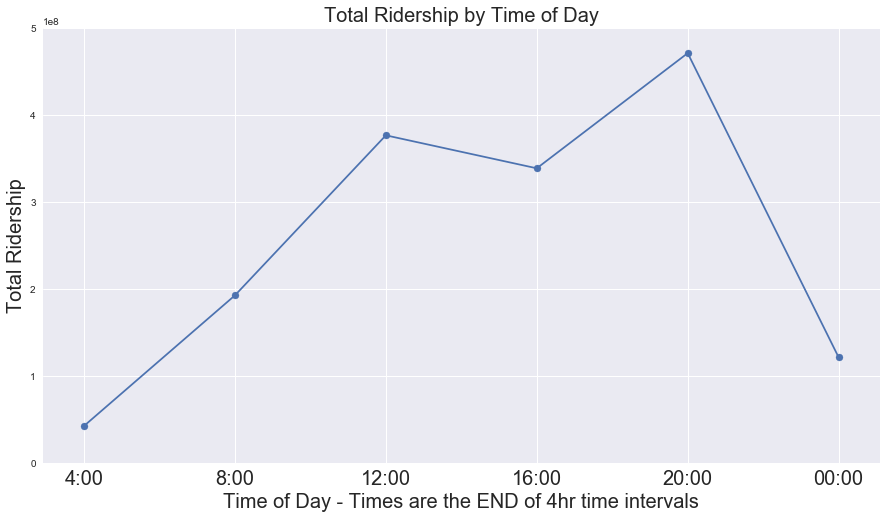

In [172]:
timelist = ['4:00','8:00','12:00','16:00','20:00','00:00']
timelist
fig, ax = plt.subplots(figsize=(15, 8))
x_pos = np.arange(len(timelist))

ax.set_xticks(x_pos)
#ax.set_xticklabels(sdf_weekday.index)
ax.set_xticklabels(timelist,fontsize=20)
ax.set_xlabel('Time of Day - Times are the END of 4hr time intervals',fontsize=20)
ax.set_ylabel('Total Ridership',fontsize=20)
ax.set_title('Total Ridership by Time of Day',fontsize=20)
ax.set_autoscaley_on(False)
ax.set_ybound(lower=0,upper=5e8)

plt.scatter(x_pos,hourly_sum_list)
plt.plot(x_pos,hourly_sum_list);


In [58]:
df20

,time,Unnamed: 0,cum_entries,cum_exits,shift_cum_entries,shift_cum_exits,entries,exits,time_ob
station,,,,,,,,,
1 AV,19:00:00,1966340695,176869075265,183509351825,1.768683e+11,1.835086e+11,779583.0,710814.0,1900-01-01 19:00:00
1 AV,20:00:00,3837883855,354836129106,359068680341,3.548347e+11,3.590672e+11,1416611.0,1436231.0,1900-01-01 20:00:00
103 ST,18:24:11,42888275,56254918,30738362,5.625361e+07,3.073753e+07,1306.0,833.0,1900-01-01 18:24:11
103 ST,19:38:26,49310304,59399496,537904391,5.939864e+07,5.379033e+08,857.0,1086.0,1900-01-01 19:38:26
103 ST,20:00:00,12041577173,19411910939,70041402247,1.941101e+10,7.004067e+10,899144.0,727635.0,1900-01-01 20:00:00
103 ST,20:21:56,49309795,59231917,537764740,5.923060e+07,5.377632e+08,1322.0,1509.0,1900-01-01 20:21:56
103 ST,21:00:00,23751524415,36320277927,140801656420,3.631879e+10,1.408003e+11,1485288.0,1357130.0,1900-01-01 21:00:00
103 ST-CORONA,19:00:00,10715210853,8534965140,8024882586,8.534577e+09,8.024256e+09,387885.0,626660.0,1900-01-01 19:00:00
103 ST-CORONA,20:00:00,20834231281,16458835235,15511643847,1.645817e+10,1.551042e+10,660258.0,1222318.0,1900-01-01 20:00:00


In [59]:
df08sum

time                 06:36:0307:00:0007:18:3107:21:3207:38:5207:41:...
Unnamed: 0                                               8980642009140
cum_entries                                             43746279438305
cum_exits                                               31816965975427
shift_cum_entries                                           4.3746e+13
shift_cum_exits                                            3.18168e+13
entries                                                    2.46991e+08
exits                                                      1.38031e+08
dtype: object

In [60]:
df20sum

time                 19:00:0020:00:0018:24:1119:38:2620:00:0020:21:...
Unnamed: 0                                               8649286465885
cum_entries                                             41625935732604
cum_exits                                               30267636912209
shift_cum_entries                                          4.16254e+13
shift_cum_exits                                            3.02672e+13
entries                                                    5.33745e+08
exits                                                      4.08239e+08
dtype: object

# day of the week analysis

In [61]:
df_15K_reject["weekday"] = df_15K_reject['datetime_ob'].map(lambda t: t.weekday())
#weather['Temp (F)'] = weather['Temp (C)'].map(lambda x: 9.0*x/5.0 + 32)
df_15K_reject.head()

,Unnamed: 0,control_area,unit,scp,station,linename,division,date,time,desc,...,cum_exits,parsed_datetime,shift_cum_entries,shift_cum_exits,shift_datetime,entries,exits,parsed_date,datetime_ob,weekday
1,1,A002,R051,02-00-00,59 ST,NQR456,BMT,06/18/2016,04:00:00,REGULAR,...,1934829,2016-06-18 04:00:00,5704958.0,1934814.0,2016-06-18 00:00:00,0.0,15.0,2016-06-18,2016-06-18 04:00:00,5
2,2,A002,R051,02-00-00,59 ST,NQR456,BMT,06/18/2016,08:00:00,REGULAR,...,1934886,2016-06-18 08:00:00,5704958.0,1934829.0,2016-06-18 04:00:00,0.0,57.0,2016-06-18,2016-06-18 08:00:00,5
3,3,A002,R051,02-00-00,59 ST,NQR456,BMT,06/18/2016,12:00:00,REGULAR,...,1934993,2016-06-18 12:00:00,5704958.0,1934886.0,2016-06-18 08:00:00,0.0,107.0,2016-06-18,2016-06-18 12:00:00,5
4,4,A002,R051,02-00-00,59 ST,NQR456,BMT,06/18/2016,16:00:00,REGULAR,...,1935069,2016-06-18 16:00:00,5704958.0,1934993.0,2016-06-18 12:00:00,0.0,76.0,2016-06-18,2016-06-18 16:00:00,5
5,5,A002,R051,02-00-00,59 ST,NQR456,BMT,06/18/2016,20:00:00,REGULAR,...,1935132,2016-06-18 20:00:00,5704958.0,1935069.0,2016-06-18 16:00:00,0.0,63.0,2016-06-18,2016-06-18 20:00:00,5


In [96]:
#total up entire system per day of the week
sdf_weekday = df_15K_reject.groupby(['weekday']).sum()
sdf_weekday.head(9)

,Unnamed: 0,cum_entries,cum_exits,shift_cum_entries,shift_cum_exits,entries,exits,weekend
weekday,,,,,,,,
0,7507780989634,36326146660240,26310194242956,3.632587e+13,2.630999e+13,276726009.0,207854420.0,0.0
1,7487185047823,36018075407857,26093458486171,3.601777e+13,2.609323e+13,303794263.0,228451746.0,0.0
2,7515304382681,36301771110633,26330562312217,3.630146e+13,2.633033e+13,315128323.0,236510265.0,0.0
3,7487522355543,36001470458400,26020879086855,3.600116e+13,2.602065e+13,311118749.0,233763135.0,0.0
4,7454651483384,35923247919909,25931004576269,3.592294e+13,2.593077e+13,305362871.0,230463014.0,0.0
5,7371341457649,35762079133109,26130236502524,3.576190e+13,2.613009e+13,179422232.0,143107289.0,1433547.0
6,7412365589948,36180917328845,26524406312370,3.618077e+13,2.652429e+13,144418413.0,116486134.0,1442103.0


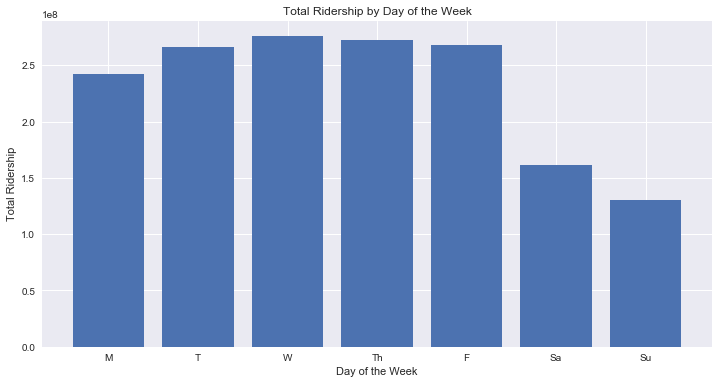

In [184]:
fig, ax = plt.subplots(figsize=(12, 6))
x_pos = np.arange(len(sdf_weekday.index))
ax.set_xticks(x_pos)
#ax.set_xticklabels(sdf_weekday.index)
ax.set_xticklabels(['M','T','W','Th','F','Sa','Su'])
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Total Ridership')
ax.set_title('Total Ridership by Day of the Week')

plt.bar(sdf_weekday.index, (sdf_weekday.entries+sdf_weekday.exits)/2);

In [193]:
((sum(sdf_weekday.exits[5:7]))/2 )   /   (sum(sdf_weekday.exits[0:5])/5)

0.570764515696501

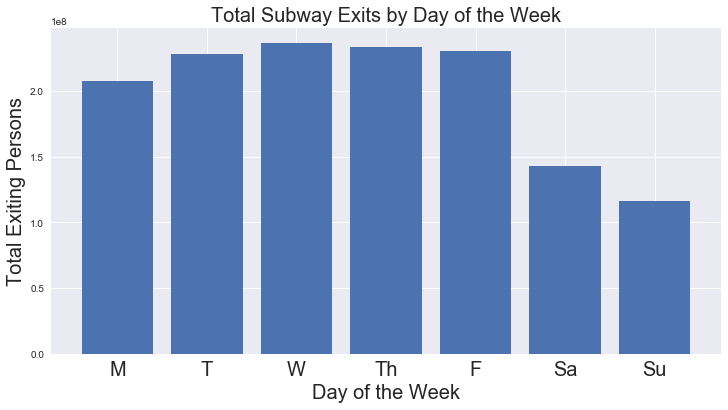

In [168]:
fig, ax = plt.subplots(figsize=(12, 6))
x_pos = np.arange(len(sdf_weekday.index))
ax.set_xticks(x_pos)
#ax.set_xticklabels(sdf_weekday.index)
ax.set_xticklabels(['M','T','W','Th','F','Sa','Su'],fontsize=20)
ax.set_xlabel('Day of the Week',fontsize=20)
ax.set_ylabel('Total Exiting Persons',fontsize=20)
ax.set_title('Total Subway Exits by Day of the Week',fontsize=20)

plt.bar(sdf_weekday.index, (sdf_weekday.exits));

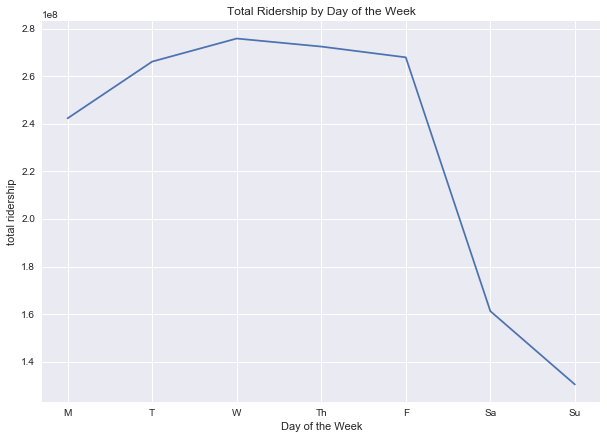

In [98]:
fig, ax = plt.subplots(figsize=(10, 7))
x_pos = np.arange(len(sdf_weekday.index))
ax.set_xticks(x_pos)
#ax.set_xticklabels(sdf_weekday.index)
ax.set_xticklabels(['M','T','W','Th','F','Sa','Su'])
ax.set_xlabel('Day of the Week')
ax.set_ylabel('total ridership')
ax.set_title('Total Ridership by Day of the Week')

plt.plot(sdf_weekday.index, (sdf_weekday.entries+sdf_weekday.exits)/2);

In [65]:
#total up per station, per day of the week
sdf_weekday = df_15K_reject.groupby(['station','weekday']).sum()
sdf_weekday.head(9)

Unnamed: 0   cum_entries     cum_exits  shift_cum_entries  \
station weekday                                                               
1 AV    0         5049285561  465198224241  473676897909       4.651972e+11   
        1         5041294471  462829077721  471091488378       4.628280e+11   
        2         5033419111  461866040906  470068578383       4.618648e+11   
        3         5039591859  461256640960  469310504194       4.612555e+11   
        4         4989385514  458066339228  466092109917       4.580651e+11   
        5         4943858257  445657352897  462451132315       4.456565e+11   
        6         4998758617  450910772597  466270452217       4.509101e+11   
103 ST  0        31614222187   49065096405  187085278543       4.906354e+10   
        1        31909729224   49453589546  191373535952       4.945189e+10   

                 shift_cum_exits    entries      exits  
station weekday                                         
1 AV    0           4.736758e+11  1013889.0  1087918.0  
        1           4.710903e+11  1120901.0  1174979.0  
        2           4.700674e+11  1195899.0  1228163.0  
        3           4.693093e+11  1181962.0  1218461.0  
        4           4.660908e+11  1220911.0  1275002.0  
        5           4.624502e+11   900214.0   926776.0  
        6           4.662697e+11   722432.0   772163.0  
103 ST  0           1.870842e+11  1559860.0  1030676.0  
        1           1.913724e+11  1702638.0  1127711.0

In [66]:
#sdf_weekday.loc[["86 ST","23 ST"]]
top20_weekday = sdf_weekday.loc[list(TopStations.index)]
top20_weekday.loc['14 ST']

,Unnamed: 0,cum_entries,cum_exits,shift_cum_entries,shift_cum_exits,entries,exits
weekday,,,,,,,
0,67356561210,190747865275,61954733191,1.907451e+11,6.195243e+10,2718973.0,2301834.0
1,67516873803,190251381791,62033205017,1.902483e+11,6.203067e+10,3112535.0,2530868.0
2,67098214273,189924445079,61735135017,1.899212e+11,6.173248e+10,3257388.0,2656208.0
3,67346031628,190187634250,61933286335,1.901844e+11,6.193064e+10,3234367.0,2650977.0
4,66503286186,187647103496,61170623522,1.876439e+11,6.116797e+10,3205253.0,2651674.0
5,66346690863,187835846219,61073279289,1.878338e+11,6.107152e+10,2069263.0,1759447.0
6,66874790971,188756055348,61411401674,1.887544e+11,6.141000e+10,1648977.0,1406093.0


''

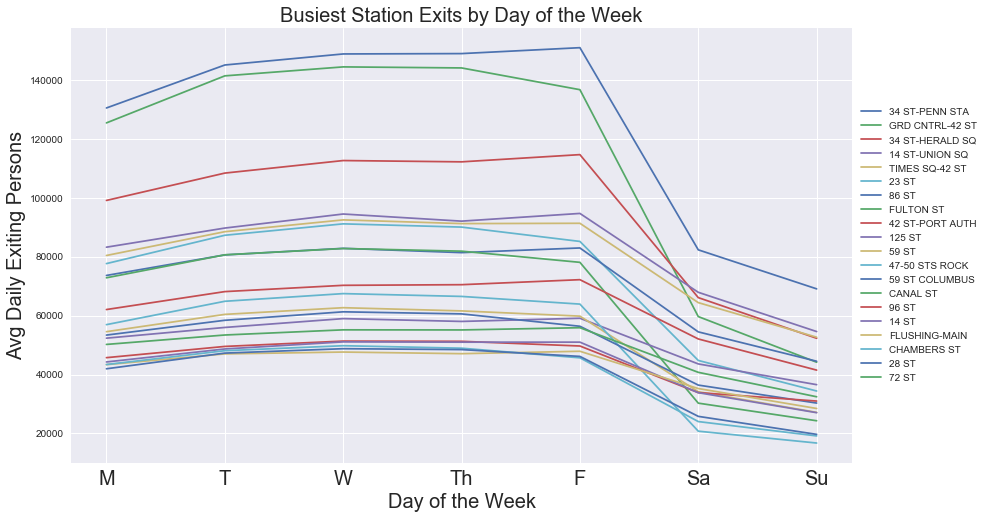

In [175]:
fig, ax = plt.subplots(figsize=(14, 8))
x_pos = np.arange(7)
ax.set_xticks(x_pos)
#ax.set_xticklabels(sdf_weekday.index)
ax.set_xticklabels(['M','T','W','Th','F','Sa','Su'],fontsize=20)
ax.set_xlabel('Day of the Week',fontsize=20)
ax.set_ylabel('Avg Daily Exiting Persons',fontsize=20)
ax.set_title('Busiest Station Exits by Day of the Week',fontsize=20)

#leg = plt.figlegend(top20_weekday.loc[station].index, TopStations.index, loc=(0.85, 0.65))
#ax.legend(top20_weekday.loc[station].index)

nweeks = 52
for station in TopStations.index:
    plt.plot(top20_weekday.loc[station].index, \
             (top20_weekday.loc[station].exits)/(nweeks),\
            label = station)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
;

''

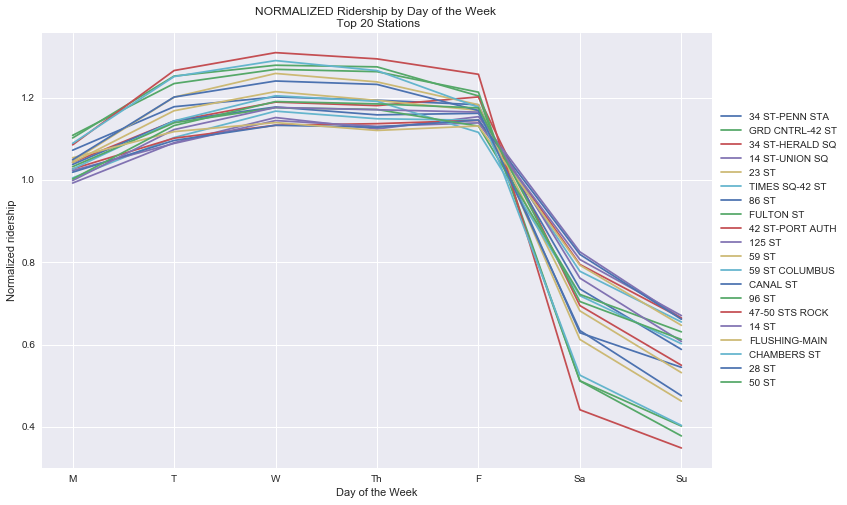

In [104]:
Avg_daily_station_usage = (TopStations.entries+TopStations.exits)/(2*nweeks*7)


fig, ax = plt.subplots(figsize=(12, 8))
x_pos = np.arange(7)
ax.set_xticks(x_pos)
#ax.set_xticklabels(sdf_weekday.index)
ax.set_xticklabels(['M','T','W','Th','F','Sa','Su'])
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Normalized ridership')
ax.set_title('NORMALIZED Ridership by Day of the Week \n Top 20 Stations')

#leg = plt.figlegend(top20_weekday.loc[station].index, TopStations.index, loc=(0.85, 0.65))
#ax.legend(top20_weekday.loc[station].index)

for station in TopStations.index:
    plt.plot(top20_weekday.loc[station].index, \
             (top20_weekday.loc[station].entries+top20_weekday.loc[station].exits)/(2*nweeks*Avg_daily_station_usage[station]),\
            label = station)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
;

### weekdays vs. weekends

In [69]:
df_15K_reject["weekend"] = df_15K_reject['weekday'].map(lambda t: t>=5)
#weather['Temp (F)'] = weather['Temp (C)'].map(lambda x: 9.0*x/5.0 + 32)
df_15K_reject.head()

,Unnamed: 0,control_area,unit,scp,station,linename,division,date,time,desc,...,parsed_datetime,shift_cum_entries,shift_cum_exits,shift_datetime,entries,exits,parsed_date,datetime_ob,weekday,weekend
1,1,A002,R051,02-00-00,59 ST,NQR456,BMT,06/18/2016,04:00:00,REGULAR,...,2016-06-18 04:00:00,5704958.0,1934814.0,2016-06-18 00:00:00,0.0,15.0,2016-06-18,2016-06-18 04:00:00,5,True
2,2,A002,R051,02-00-00,59 ST,NQR456,BMT,06/18/2016,08:00:00,REGULAR,...,2016-06-18 08:00:00,5704958.0,1934829.0,2016-06-18 04:00:00,0.0,57.0,2016-06-18,2016-06-18 08:00:00,5,True
3,3,A002,R051,02-00-00,59 ST,NQR456,BMT,06/18/2016,12:00:00,REGULAR,...,2016-06-18 12:00:00,5704958.0,1934886.0,2016-06-18 08:00:00,0.0,107.0,2016-06-18,2016-06-18 12:00:00,5,True
4,4,A002,R051,02-00-00,59 ST,NQR456,BMT,06/18/2016,16:00:00,REGULAR,...,2016-06-18 16:00:00,5704958.0,1934993.0,2016-06-18 12:00:00,0.0,76.0,2016-06-18,2016-06-18 16:00:00,5,True
5,5,A002,R051,02-00-00,59 ST,NQR456,BMT,06/18/2016,20:00:00,REGULAR,...,2016-06-18 20:00:00,5704958.0,1935069.0,2016-06-18 16:00:00,0.0,63.0,2016-06-18,2016-06-18 20:00:00,5,True


In [70]:
sdf_weekend = df_15K_reject.groupby(['station','weekday','weekend']).sum()  
sdf_weekend = sdf_weekend.groupby(['station','weekend']).mean()  #note mean() this time instead of sum()
sdf_weekend.head(9)

Unnamed: 0   cum_entries     cum_exits  \
station       weekend                                             
1 AV          False    5.030595e+09  4.618433e+11  4.700479e+11   
              True     4.971308e+09  4.482841e+11  4.643608e+11   
103 ST        False    3.149249e+10  4.892430e+10  1.865391e+11   
              True     3.104623e+10  4.831051e+10  1.846887e+11   
103 ST-CORONA False    2.732773e+10  2.164945e+10  2.037947e+10   
              True     2.688696e+10  2.127903e+10  2.003742e+10   
104 ST        False    5.199408e+09  9.262236e+10  7.506192e+10   
              True     5.480177e+09  2.426962e+11  2.257521e+11   
110 ST        False    1.586377e+10  9.384811e+09  9.411327e+09   

                       shift_cum_entries  shift_cum_exits    entries  \
station       weekend                                                  
1 AV          False         4.618421e+11     4.700467e+11  1146712.4   
              True          4.482833e+11     4.643599e+11   811323.0   
103 ST        False         4.892260e+10     1.865380e+11  1690454.4   
              True          4.830949e+10     1.846879e+11  1024710.5   
103 ST-CORONA False         2.164838e+10     2.037871e+10  1068862.8   
              True          2.127833e+10     2.003686e+10   693584.0   
104 ST        False         9.262219e+10     7.506185e+10   173269.2   
              True          2.426961e+11     2.257521e+11    73320.5   
110 ST        False         9.384163e+09     9.410843e+09   647799.0   

                           exits  
station       weekend             
1 AV          False    1196904.6  
              True      849469.5  
103 ST        False    1114868.2  
              True      747738.5  
103 ST-CORONA False     761757.2  
              True      554157.0  
104 ST        False      72523.8  
              True       36744.5  
110 ST        False     483768.6

In [71]:
top20_weekend = sdf_weekend.loc[list(TopStations.index)]
top20_weekend.loc['14 ST']

,Unnamed: 0,cum_entries,cum_exits,shift_cum_entries,shift_cum_exits,entries,exits
weekend,,,,,,,
False,6.716419e+10,1.897517e+11,6.176540e+10,1.897486e+11,6.176284e+10,3105703.2,2558312.2
True,6.661074e+10,1.882960e+11,6.124234e+10,1.882941e+11,6.124076e+10,1859120.0,1582770.0


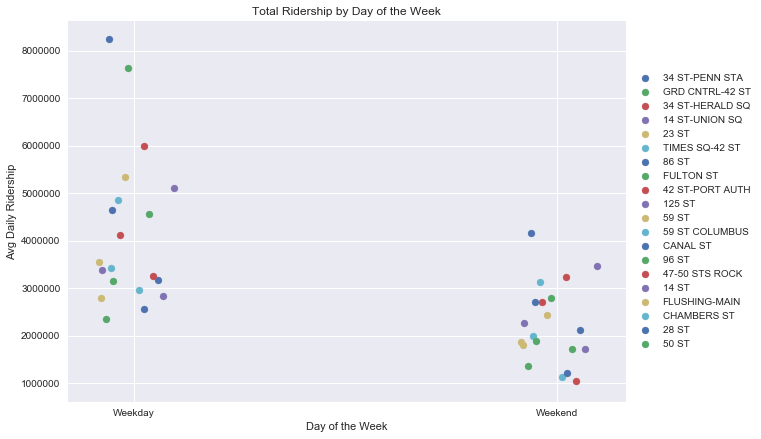

In [105]:
fig, ax = plt.subplots(figsize=(10, 7))
x_pos = np.arange(7)
ax.set_xticks(x_pos)
ax.set_xticklabels(['Weekday','Weekend'])
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Avg Daily Ridership')
ax.set_title('Total Ridership by Day of the Week')

for station in TopStations.index:
    plt.scatter(top20_weekend.loc[station].index+0.2*np.random.random()-0.1, \
             (top20_weekend.loc[station].entries+top20_weekend.loc[station].exits)/(2),\
            label = station)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

''

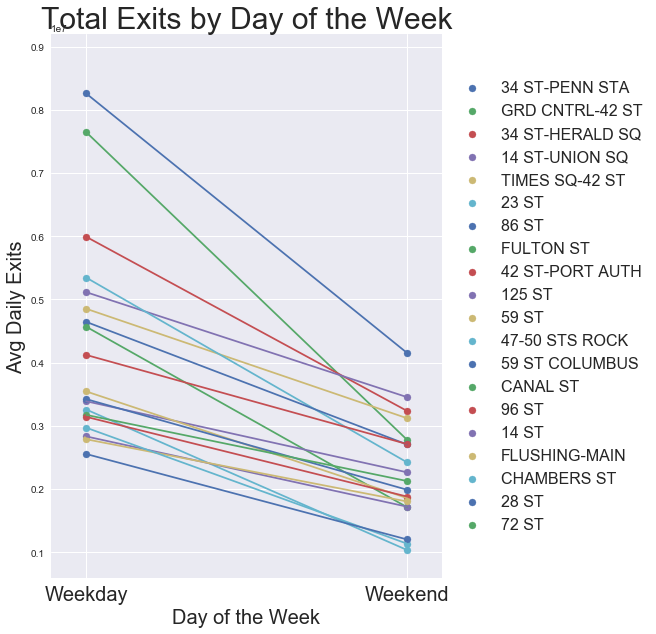

In [183]:
fig, ax = plt.subplots(figsize=(7, 10))
x_pos = np.arange(7)
ax.set_xticks(x_pos)
ax.set_xticklabels(['Weekday','Weekend'],fontsize=20)
ax.set_xlabel('Day of the Week',fontsize=20)
ax.set_ylabel('Avg Daily Exits',fontsize=20)
ax.set_title('Total Exits by Day of the Week',fontsize=30)
ax.set_ybound(lower=0,upper=0.85e8)

for station in TopStations.index:
    plt.scatter(top20_weekend.loc[station].index, \
             (top20_weekend.loc[station].entries+top20_weekend.loc[station].exits)/(2),\
            label = station)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=16)
for station in TopStations.index:
    plt.plot(top20_weekend.loc[station].index, \
             (top20_weekend.loc[station].entries+top20_weekend.loc[station].exits)/(2),\
            label = station)
;

In [74]:
top20_weekend.loc['23 ST'].index

Index([False, True], dtype='object', name='weekend')

In [124]:
top20_weekend_sorted = top20_weekend.sort_values('exits',ascending=False)


,,Unnamed: 0,cum_entries,cum_exits,shift_cum_entries,shift_cum_exits,entries,exits
station,weekend,,,,,,,
34 ST-PENN STA,False,1.407627e+11,8.908322e+11,5.318725e+11,8.908232e+11,5.318649e+11,8982045.2,7533543.0
GRD CNTRL-42 ST,False,1.565599e+11,9.416370e+11,2.576741e+11,9.416290e+11,2.576669e+11,8094142.2,7197815.6
34 ST-HERALD SQ,False,6.356023e+10,5.362956e+11,4.300720e+11,5.362893e+11,4.300663e+11,6291899.8,5688992.0
14 ST-UNION SQ,False,3.194103e+10,3.647269e+11,1.069639e+11,3.647214e+11,1.069592e+11,5504070.0,4723945.2
TIMES SQ-42 ST,False,8.982618e+10,1.234747e+12,9.851889e+11,1.234742e+12,9.851843e+11,5085925.6,4617623.0
23 ST,False,1.023015e+11,1.223157e+12,1.093008e+12,1.223151e+12,1.093003e+12,6203700.4,4485895.0
86 ST,False,9.460355e+10,4.592687e+11,2.076521e+11,4.592636e+11,2.076479e+11,5113294.0,4175048.2
FULTON ST,False,1.360791e+11,1.303409e+12,1.325898e+12,1.303404e+12,1.325894e+12,5013941.8,4120832.8
34 ST-PENN STA,True,1.368101e+11,8.462107e+11,5.045631e+11,8.462063e+11,5.045592e+11,4375029.0,3936771.0


In [132]:
top20_weekend_sorted[top20_weekend_sorted.index == 'True']

,,Unnamed: 0,cum_entries,cum_exits,shift_cum_entries,shift_cum_exits,entries,exits
station,weekend,,,,,,,


In [133]:
top20_WE = top20_weekend_sorted.reset_index(level=1)
top20_WE.head()

,weekend,Unnamed: 0,cum_entries,cum_exits,shift_cum_entries,shift_cum_exits,entries,exits
station,,,,,,,,
34 ST-PENN STA,False,1.407627e+11,8.908322e+11,5.318725e+11,8.908232e+11,5.318649e+11,8982045.2,7533543.0
GRD CNTRL-42 ST,False,1.565599e+11,9.416370e+11,2.576741e+11,9.416290e+11,2.576669e+11,8094142.2,7197815.6
34 ST-HERALD SQ,False,6.356023e+10,5.362956e+11,4.300720e+11,5.362893e+11,4.300663e+11,6291899.8,5688992.0
14 ST-UNION SQ,False,3.194103e+10,3.647269e+11,1.069639e+11,3.647214e+11,1.069592e+11,5504070.0,4723945.2
TIMES SQ-42 ST,False,8.982618e+10,1.234747e+12,9.851889e+11,1.234742e+12,9.851843e+11,5085925.6,4617623.0


In [145]:
a = top20_WE[top20_WE.weekend==True].exits[0:10].index

for line in a: print(line)

34 ST-PENN STA
14 ST-UNION SQ
34 ST-HERALD SQ
TIMES SQ-42 ST
GRD CNTRL-42 ST
86 ST
42 ST-PORT AUTH
125 ST
23 ST
CANAL ST


In [147]:
b = top20_WE[top20_WE.weekend==False].exits[0:10].index
for line in b: print(line)

34 ST-PENN STA
GRD CNTRL-42 ST
34 ST-HERALD SQ
14 ST-UNION SQ
TIMES SQ-42 ST
23 ST
86 ST
FULTON ST
42 ST-PORT AUTH
47-50 STS ROCK


NameError: name 'b' is not defined